In [653]:
import os
import pandas as pd
import requests
import numpy as np
from Bio.PDB import MMCIFParser, Superimposer, PDBIO
from optparse import OptionParser
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from collections import Counter
from Bio.PDB import MMCIFParser, Superimposer, PDBIO
from optparse import OptionParser
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# random notes

In [28]:
#Because of the ways we are normalizing the data, normalized data are not bound within -1 to +1                                                
#Therefore, scaling would be a better term for the operation 
#normalized by nucleotides and normalized by the A, C and G, U group might output the similar result

# Reproducing data from Katie's ETC paper

In [20]:
#this python function was taken from script Katie shared with me
def normalize_all_old(profile):
    """ normalizes raw reactivity """
    #define the 90th and 98th percentile of raw reactivity
    percentile90,percentile98 = profile['raw_reactivity'].quantile(0.90), profile['raw_reactivity'].quantile(0.98)
    #calculate the average of the values between the 90th and 98th percentile
    average = profile['raw_reactivity'].between(percentile90, percentile98).mean()
    #set the normalized reactivity to raw reactivity divided by the average
    profile['norm_reactivity1'] = profile['raw_reactivity'] / average
    #replace every value in profile that is np.nan with "NA"
    profile = profile.replace(np.nan, "NA")
    #return the profile
    return profile

In [105]:
#this is the raw DMS reactivity data from Katie's ETC paper
raw_paper_DMS= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/GSE254895_DMS_tgirt55_filtmerge_profile.txt', delimiter= '\t')
raw_paper_ETC= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/GSE254895_ETC_tgirt55_filtmerge_profile.txt', delimiter= '\t')

In [111]:
#in the ETC paper normalization was done by all nucleotides within a transcriptome

#filtering different rRNAs in DMS data
DMS_5S = raw_paper_DMS[raw_paper_DMS['RNA']=='5S']
DMS_5S.index= np.arange(0, len(DMS_5S))

DMS_16S= raw_paper_DMS[raw_paper_DMS['RNA']=='16S']
DMS_16S.index= np.arange(0, len(DMS_16S))

DMS_23S= raw_paper_DMS[raw_paper_DMS['RNA']=='23S']
DMS_23S.index= np.arange(0, len(DMS_23S))

#filtering different rRNAs in ETC data
ETC_5S = raw_paper_ETC[raw_paper_ETC['RNA']=='5S']
ETC_5S.index= np.arange(0, len(ETC_5S))

ETC_16S= raw_paper_ETC[raw_paper_ETC['RNA']=='16S']
ETC_16S.index= np.arange(0, len(ETC_16S))

ETC_23S= raw_paper_ETC[raw_paper_ETC['RNA']=='23S']
ETC_23S.index= np.arange(0, len(ETC_23S))

In [112]:
DMS_5S1= normalize_all_old(DMS_5S)
DMS_16S1= normalize_all_old(DMS_16S)
DMS_23S1= normalize_all_old(DMS_23S)

ETC_5S1= normalize_all_old(ETC_5S)
ETC_16S1= normalize_all_old(ETC_16S)
ETC_23S1= normalize_all_old(ETC_23S)

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2299532144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile['norm_reactivity1'] = profile['raw_reactivity'] / average
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2299532144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile['norm_reactivity1'] = profile['raw_reactivity'] / average
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2299532144.py:9: SettingWithCopyWarning: 
A value is trying to

In [113]:
ETC_23S1

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,Untreated_mutations,Untreated_read_depth,Untreated_effective_depth,Untreated_rate,Untreated_off_target_mapped_depth,Untreated_low_mapq_mapped_depth,Untreated_mapped_depth,raw_reactivity,norm_reactivity,norm_reactivity1
0,23S,1,G,0,537247,518851,0.000000,0,566,537247,0,552028,533586,0.000000,0,2099,552028,0.0,0.0,0.0
1,23S,2,G,0,648080,611754,0.000000,0,584,648080,0,658573,623454,0.000000,0,2211,658573,0.0,0.0,0.0
2,23S,3,U,368,781789,736949,0.000499,0,610,781789,283,780367,738127,0.000383,0,2371,780367,0.000116,0.001465,0.001465
3,23S,4,U,392,911924,856850,0.000457,0,624,911924,241,888723,838042,0.000288,0,2509,888723,0.000169,0.002134,0.002134
4,23S,5,A,458,1035748,810563,0.000565,0,637,1035748,725,981267,780570,0.000929,0,2580,981267,-0.000364,-0.004596,-0.004596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,23S,2900,A,3,119476,1517,0.001978,0,4674,119476,1,446282,2501,0.000400,0,23363,446282,NA,NA,NA
2900,23S,2901,C,2,115941,1433,0.001396,0,4647,115941,3,434994,2337,0.001284,0,23289,434994,NA,NA,NA
2901,23S,2902,C,0,108524,1702,0.000000,0,4617,108524,1,412388,2815,0.000355,0,23214,412388,NA,NA,NA
2902,23S,2903,U,4,94037,1614,0.002478,0,4584,94037,2,368314,2687,0.000744,0,23013,368314,NA,NA,NA


# updated normalization function

In [529]:
#DMS reactivities data shared by Katie on March 13th 2025
#these dataframe contain the raw mutational count and reactivities column
# the 'norm_reactivity' column contain the DMS reactivities normalized by all nts 
#transcripts seperately
#nucleotides together

#raw_ecoli and raw_ecoli_ETC data are the same data shared in Kati'es ETC paper
raw_ecoli= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/ecoli_for_Sharear_profile.txt', delimiter= '\t')
raw_yeast= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/yeast_for_Sharear_profile.txt', delimiter= '\t')
raw_human= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/human_for_Sharear_profile.txt', delimiter= '\t')

raw_ecoli_ETC= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/ETC_ecoli_for_Sharear_profile.txt', delimiter= '\t')

#we will add three additional normalization column
#norm_reactivity_all= normalized by all nucleotides
##all raw reactivity will be normalized by the average of the 90-98th percentile of the raw reactivities


#norm_reactivity_nt= normalized by nucleotides
##

#norm_reactivity_grp= normalized by A, C and G, U group


In [478]:
#normalize by all
#all residues will be normalize by the average of 90-98 th percentile reactivities of A, C, G, and U

def normalize_all_new(df):
    
    #step 1: identifying 90-98th percentile (2-8%)
    percentile90 = df['raw_reactivity'].dropna().astype(float).quantile(0.90)
    percentile98 = df['raw_reactivity'].dropna().astype(float).quantile(0.98)
    
    #step 2: filter df (raw_reactivity) within 90-98th percentile
    df1 = df[df['raw_reactivity'].between(percentile90, percentile98, inclusive='both')]
    
    #step 3: calculate the average of raw_reactivity within 90-98th percentile
    average= df1['raw_reactivity'].mean()
    
    #step 4: set the normalized reactivity to raw reactivity divided by the average
    df['norm_reactivity_all'] = df['raw_reactivity'] / average
    
    #step 5: values in norm_reactivity >1 set to 1, values less than -0.1 set to -0.1
    df['norm_reactivity_all'] = np.where(df['norm_reactivity_all'] > 1, 1, df['norm_reactivity_all'])
    df['norm_reactivity_all'] = np.where(df['norm_reactivity_all'] < -0.1, -0.1, df['norm_reactivity_all'])
    #replace every value in profile that is np.nan with "NA"
    ##profile = profile.replace(np.nan, "NA")
    #return the profile
    return df

In [57]:
#this python function was taken from script Katie shared with me
def normalize_nt_old(profile):
    """ normalizes raw reactivity """
    #define the 90th and 98th percentile of raw reactivity when profile["Sequence"] == "A"
    A90,A98 = profile['raw_reactivity'].where(profile["Sequence"] == "A").dropna().quantile(0.90), profile['raw_reactivity'].where(profile["Sequence"] == "A").dropna().quantile(0.98)
    Aavg = profile['raw_reactivity'].where((profile["Sequence"] == "A") & (profile['raw_reactivity'] >= A90) & (profile['raw_reactivity'] <= A98)).mean()
    C90,C98 = profile['raw_reactivity'].where(profile["Sequence"] == "C").dropna().quantile(0.90), profile['raw_reactivity'].where(profile["Sequence"] == "C").dropna().quantile(0.98)
    Cavg = profile['raw_reactivity'].where((profile["Sequence"] == "C") & (profile['raw_reactivity'] >= C90) & (profile['raw_reactivity'] <= C98)).mean()
    G90,G98 = profile['raw_reactivity'].where(profile["Sequence"] == "G").dropna().quantile(0.90), profile['raw_reactivity'].where(profile["Sequence"] == "G").dropna().quantile(0.98)
    Gavg = profile['raw_reactivity'].where((profile["Sequence"] == "G") & (profile['raw_reactivity'] >= G90) & (profile['raw_reactivity'] <= G98)).mean()
    U90,U98 = profile['raw_reactivity'].where(profile["Sequence"] == "U").dropna().quantile(0.90), profile['raw_reactivity'].where(profile["Sequence"] == "U").dropna().quantile(0.98)
    Uavg = profile['raw_reactivity'].where((profile["Sequence"] == "U") & (profile['raw_reactivity'] >= U90) & (profile['raw_reactivity'] <= U98)).mean()
    #set the normalized reactivity to raw reactivity divided by the average for each nucleotide
    profile['norm_reactivity5'] = np.where(profile["Sequence"] == "A", profile['raw_reactivity'] / Aavg, np.nan)
    profile['norm_reactivity5'] = np.where(profile["Sequence"] == "C", profile['raw_reactivity'] / Cavg, profile['norm_reactivity5'])
    profile['norm_reactivity5'] = np.where(profile["Sequence"] == "G", profile['raw_reactivity'] / Gavg, profile['norm_reactivity5'])
    profile['norm_reactivity5'] = np.where(profile["Sequence"] == "U", profile['raw_reactivity'] / Uavg, profile['norm_reactivity5'])
    #values in norm_reactivity >1 set to 1, values less than -0.1 set to -0.1
    profile['norm_reactivity5'] = np.where(profile['norm_reactivity5'] > 1, 1, profile['norm_reactivity5'])
    profile['norm_reactivity5'] = np.where(profile['norm_reactivity5'] < -0.1, -0.1, profile['norm_reactivity5'])
    #replace every value in profile that is np.nan with "NA"
    #profile = profile.replace(np.nan, "nan")
    #return the profile
    return profile

In [479]:
def normalize_nt_new(df):
    #filter the raw reactivities of A, C, G, and U residues
    df_A= df[df['Sequence']=='A']
    df_A.index= np.arange(0, len(df_A))
    
    df_C= df[df['Sequence']=='C']
    df_C.index= np.arange(0, len(df_C))
    
    df_G= df[df['Sequence']=='G']
    df_G.index= np.arange(0, len(df_G))
    
    df_U= df[df['Sequence']=='U']
    df_U.index= np.arange(0, len(df_U))
    
    #identifying 90-98th percentile (same as 2-8% filtration in 2-8% normalization)
    pA90= df_A['raw_reactivity'].astype(float).quantile(0.90)
    pA98= df_A['raw_reactivity'].astype(float).quantile(0.98)
    
    pC90= df_C['raw_reactivity'].astype(float).quantile(0.90)
    pC98= df_C['raw_reactivity'].astype(float).quantile(0.98)
    
    pG90= df_G['raw_reactivity'].astype(float).quantile(0.90)
    pG98= df_G['raw_reactivity'].astype(float).quantile(0.98)
    
    pU90= df_U['raw_reactivity'].astype(float).quantile(0.90)
    pU98= df_U['raw_reactivity'].astype(float).quantile(0.98)
    
    #filter the raw_reactivities within 90-98th percentile of the raw reactivities of A, C, G, and U
    df_A1= df_A[df_A['raw_reactivity'].between(pA90, pA98, inclusive='both')]
    df_A1.index= np.arange(0, len(df_A1))
    
    df_C1= df_C[df_C['raw_reactivity'].between(pC90, pC98, inclusive='both')]
    df_C1.index= np.arange(0, len(df_C1))
    
    df_G1= df_G[df_G['raw_reactivity'].between(pG90, pG98, inclusive='both')]
    df_G1.index= np.arange(0, len(df_G1))
    
    df_U1= df_U[df_U['raw_reactivity'].between(pU90, pU98, inclusive='both')]
    df_U1.index= np.arange(0, len(df_U1))
    
    #calculate the average of the raw_reactivities with 90- 98th percentile raw_reactivities of A, C, G, and U
    avg_A= df_A1['raw_reactivity'].mean()
    avg_C= df_C1['raw_reactivity'].mean()
    avg_G= df_G1['raw_reactivity'].mean()
    avg_U= df_U1['raw_reactivity'].mean()
    
    #set the normalized reactivity to raw reactivity divided by the average for each nucleotide
    df['norm_reactivity_nt'] = np.where(df["Sequence"] == "A", df['raw_reactivity'] / avg_A, np.nan)
    df['norm_reactivity_nt'] = np.where(df["Sequence"] == "C", df['raw_reactivity'] / avg_C, df['norm_reactivity_nt'])
    df['norm_reactivity_nt'] = np.where(df["Sequence"] == "G", df['raw_reactivity'] / avg_G, df['norm_reactivity_nt'])
    df['norm_reactivity_nt'] = np.where(df["Sequence"] == "U", df['raw_reactivity'] / avg_U, df['norm_reactivity_nt'])
    #values in norm_reactivity >1 set to 1, values less than -0.1 set to -0.1
    df['norm_reactivity_nt'] = np.where(df['norm_reactivity_nt'] > 1, 1, df['norm_reactivity_nt'])
    df['norm_reactivity_nt'] = np.where(df['norm_reactivity_nt'] < -0.1, -0.1, df['norm_reactivity_nt'])
    #replace every value in profile that is np.nan with "NA"
    #profile = profile.replace(np.nan, "nan")
    #return the profile
    return df

In [480]:
#group normalization
# A will be normalize by the average of 90-98th percentile reactivities of A and C
# C will be normalize by the average of 90-98th percentile reactivities of A and C
# G will be normalize by the average of 90-98th percentile reactivities of G and U
# U will be normalize by the average of 90-98th percentile reactivities of G and U

def normalize_grp(df):
    #step 1: filter the raw reactivities of A, C and G, U
    df_AC= df[df['Sequence'].isin(['A', 'C'])]
    df_AC.index= np.arange(0, len(df_AC))
    
    df_GU= df[df['Sequence'].isin(['G', 'U'])]
    df_GU.index= np.arange(0, len(df_GU))

    #step 2: identifying 90-98th percentile (same as 2-8% filtration in 2-8% normalization)
    ac90= df_AC['raw_reactivity'].astype(float).quantile(0.90)
    ac98= df_AC['raw_reactivity'].astype(float).quantile(0.98)
    
    gu90= df_GU['raw_reactivity'].astype(float).quantile(0.90)
    gu98= df_GU['raw_reactivity'].astype(float).quantile(0.98)
    
    #step 3: filter the raw_reactivities within 90-98th percentile of the raw reactivities
    df_AC1= df_AC[df_AC['raw_reactivity'].between(ac90, ac98, inclusive='both')]
    df_GU1= df_GU[df_GU['raw_reactivity'].between(gu90, gu98, inclusive='both')]
    
    #step 4: calculate the average of the raw_reactivities with 90- 98th percentile raw_reactivities
    avg_AC= df_AC1['raw_reactivity'].mean()
    avg_GU= df_GU1['raw_reactivity'].mean()
    
    #step 5: normalizing reactivities
    df['norm_reactivity_grp'] = np.where(df["Sequence"] == "A", df['raw_reactivity'] / avg_AC, np.nan)
    df['norm_reactivity_grp'] = np.where(df["Sequence"] == "C", df['raw_reactivity'] / avg_AC, df['norm_reactivity_grp'])
    
    df['norm_reactivity_grp'] = np.where(df["Sequence"] == "G", df['raw_reactivity'] / avg_GU, df['norm_reactivity_grp'])
    df['norm_reactivity_grp'] = np.where(df["Sequence"] == "U", df['raw_reactivity'] / avg_GU, df['norm_reactivity_grp'])
    
    #step 6: values in norm_reactivity >1 set to 1, values less than -0.1 set to -0.1
    df['norm_reactivity_grp'] = np.where(df['norm_reactivity_grp'] > 1, 1, df['norm_reactivity_grp'])
    df['norm_reactivity_grp'] = np.where(df['norm_reactivity_grp'] < -0.1, -0.1, df['norm_reactivity_grp'])
    
    return df

# Normalization of DMS reactivities

In [530]:
raw_ecoli1= normalize_all_new(raw_ecoli)
raw_yeast1= normalize_all_new(raw_yeast)
raw_human1= normalize_all_new(raw_human)

In [531]:
raw_ecoli2= normalize_nt_new(raw_ecoli1)
raw_yeast2= normalize_nt_new(raw_yeast1)
raw_human2= normalize_nt_new(raw_human1)

In [532]:
#these are the df in which the p-values will be calculated
#these df will also be used to make the ROC and reactivities plot
raw_ecoli3= normalize_grp(raw_ecoli2)
raw_yeast3= normalize_grp(raw_yeast2)
raw_human3= normalize_grp(raw_human2)

In [241]:
#raw_ecoli3.to_csv('Ecoli_DMS_3norms.csv', index= False)
raw_yeast3.to_csv('yeast_DMS_3norms.csv', index= False)
raw_human3.to_csv('human_DMS_3norms.csv', index= False)

In [ ]:
tyeast= pd.read_csv()

In [243]:
raw_human['RNA'].value_counts()

human28S    5069
human18S    1869
human5S      120
Name: RNA, dtype: int64

In [484]:
raw_yeast3

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp
0,yeast5.8S,1,A,0,62614,61261,0.000000,0,0,62614,...,0.000000,0,0,20673,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,yeast5.8S,2,A,0,66493,64123,0.000000,0,0,66493,...,0.000000,0,0,23121,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,yeast5.8S,3,A,119,70190,67344,0.001767,0,0,70190,...,0.012881,0,0,26129,0.134159,0.001728,0.022752,0.081045,0.027527,0.033724
3,yeast5.8S,4,C,231,73576,70689,0.003268,0,0,73576,...,0.026927,0,0,28872,0.056668,0.001526,0.020092,0.071571,0.044034,0.029782
4,yeast5.8S,5,U,33,77058,74455,0.000443,0,0,77058,...,0.000813,0,0,32816,0.237894,0.000193,0.002541,0.009052,0.199971,0.109605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,yeast25S,3392,U,1,211,181,0.005525,0,2,211,...,0.000000,0,0,386,NaN,NaN,NaN,NaN,NaN,NaN
5471,yeast25S,3393,U,0,197,174,0.000000,0,2,197,...,0.000000,0,0,300,NaN,NaN,NaN,NaN,NaN,NaN
5472,yeast25S,3394,U,2,185,168,0.011905,0,2,185,...,0.014706,0,0,182,0.809524,NaN,NaN,NaN,NaN,NaN
5473,yeast25S,3395,G,0,174,162,0.000000,0,2,174,...,0.000000,0,0,136,NaN,NaN,NaN,NaN,NaN,NaN


## E.coli 5S 

In [225]:
raw_ecoli_5s= raw_ecoli3[raw_ecoli3['RNA']=='5S']
raw_ecoli_5s.index= np.arange(0, len(raw_ecoli_5s))

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/765634731.py:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


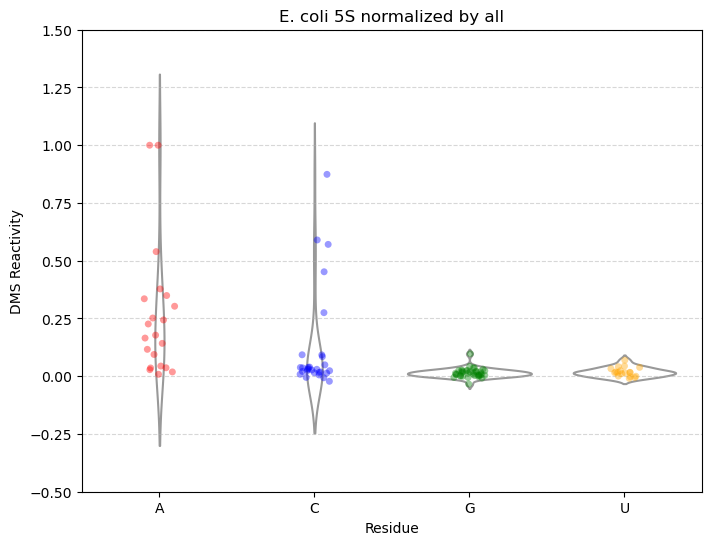

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 5S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1081040811.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


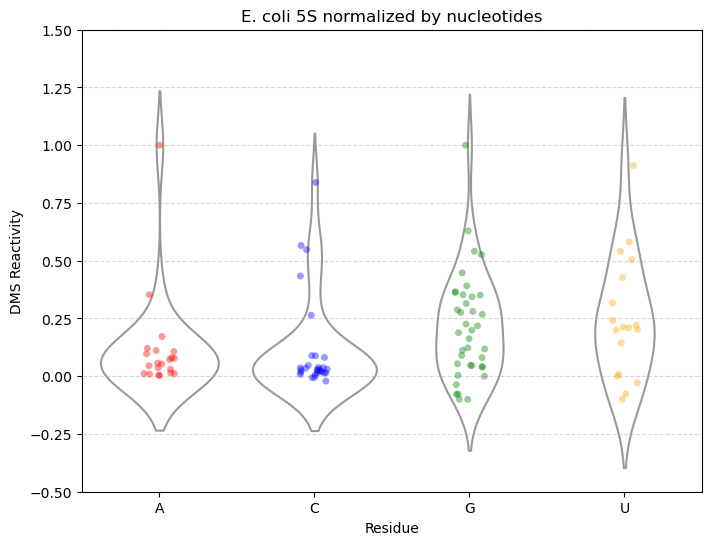

In [71]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 5S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3191152567.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


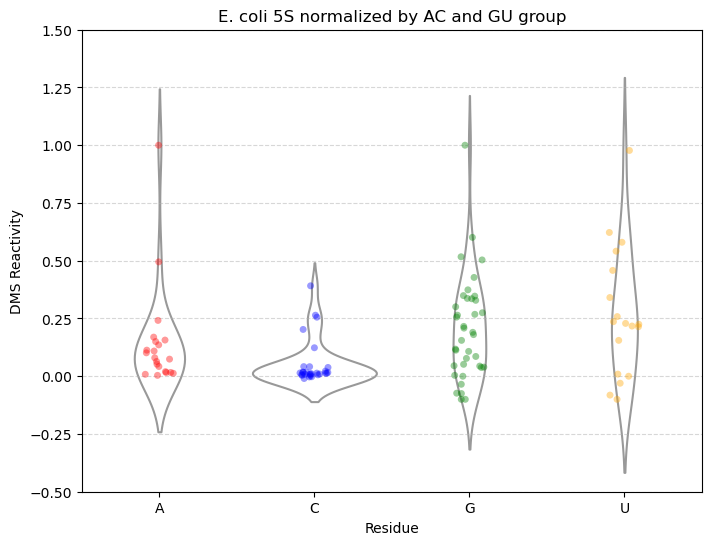

In [73]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 5S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

## E. coli 16S 

In [74]:
raw_ecoli_16s= raw_ecoli3[raw_ecoli3['RNA']=='16S']
raw_ecoli_16s.index= np.arange(0, len(raw_ecoli_16s))

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1212950617.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


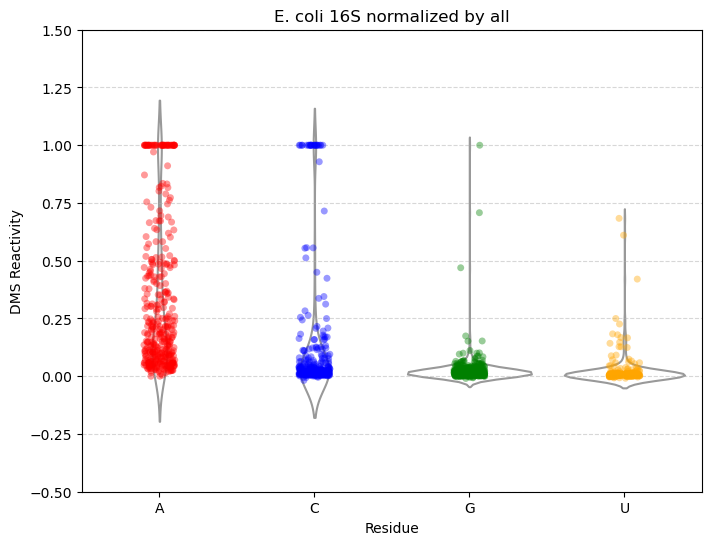

In [76]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_16s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 16S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [274]:
raw_ecoli_16s1= raw_ecoli_16s[raw_ecoli_16s['norm_reactivity_all']>0.25]
raw_ecoli_16s2= raw_ecoli_16s1[raw_ecoli_16s1['Sequence']=='U']

In [275]:
raw_ecoli_16s2

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,norm_reactivity5
676,16S,677,U,10370,1048732,878135,0.011809,0,2342,1043302,...,0,0,0,0.011362,0.011362,0.143608,0.610519,1.0,1.0,1.0
827,16S,828,U,9580,1388651,1170762,0.008183,0,3175,1382902,...,0,0,0,0.007825,0.007825,0.098903,0.420464,1.0,1.0,1.0
1380,16S,1381,U,29768,2434525,2283850,0.013034,0,2742,2426524,...,0,0,0,0.012720,0.012720,0.160772,0.683488,1.0,1.0,1.0


In [284]:
raw_ecoli_16s3= raw_ecoli_16s[raw_ecoli_16s['norm_reactivity_nt'].between(0.4, 1.0, inclusive='both')]
raw_ecoli_16s4= raw_ecoli_16s3[raw_ecoli_16s3['Sequence']=='U']
raw_ecoli_16s5= raw_ecoli_16s4[raw_ecoli_16s4['Nucleotide'].between(670, 740, inclusive='both')]

In [285]:
raw_ecoli_16s5

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,norm_reactivity5
676,16S,677,U,10370,1048732,878135,0.011809,0,2342,1043302,...,0,0,0,0.011362,0.011362,0.143608,0.610519,1.000000,1.000000,1.000000
700,16S,701,U,1397,1019039,920077,0.001518,0,2075,1015643,...,0,0,0,0.001228,0.001227,0.015508,0.065931,0.866474,0.928925,0.866474
722,16S,723,U,1715,1057679,924026,0.001856,0,1956,1053221,...,0,0,0,0.001144,0.001144,0.014459,0.061471,0.807862,0.866088,0.807862


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1555773335.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


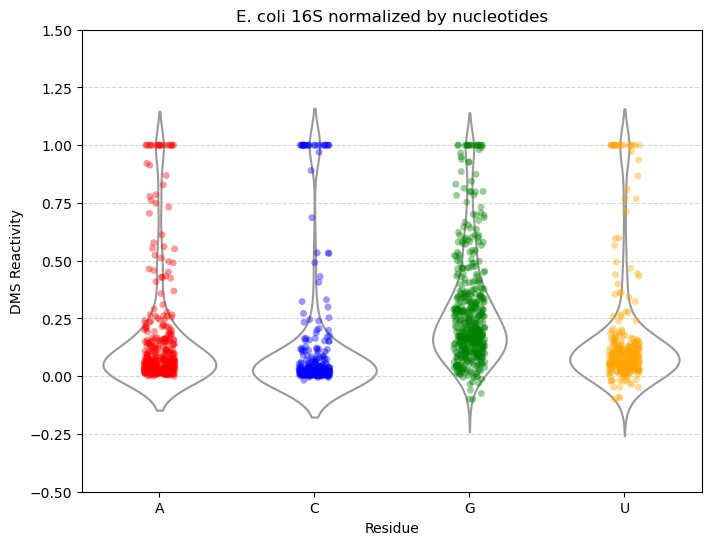

In [78]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_16s, inner=None, alpha=0.5, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 16S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1630834690.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


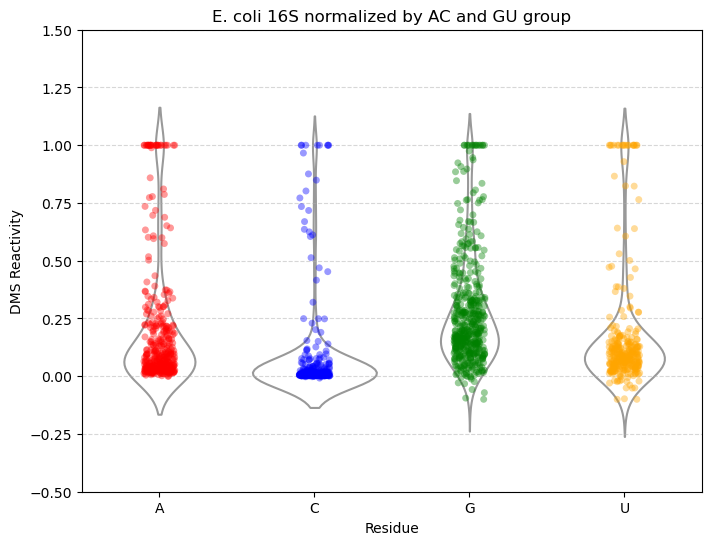

In [80]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_16s, inner=None, alpha=0.5, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 16S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

##  E. coli 23S

In [81]:
raw_ecoli_23s= raw_ecoli3[raw_ecoli3['RNA']=='23S']
raw_ecoli_23s.index= np.arange(0, len(raw_ecoli_23s))

In [53]:
raw_ecoli_23s.shape

(2904, 31)

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3286886937.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


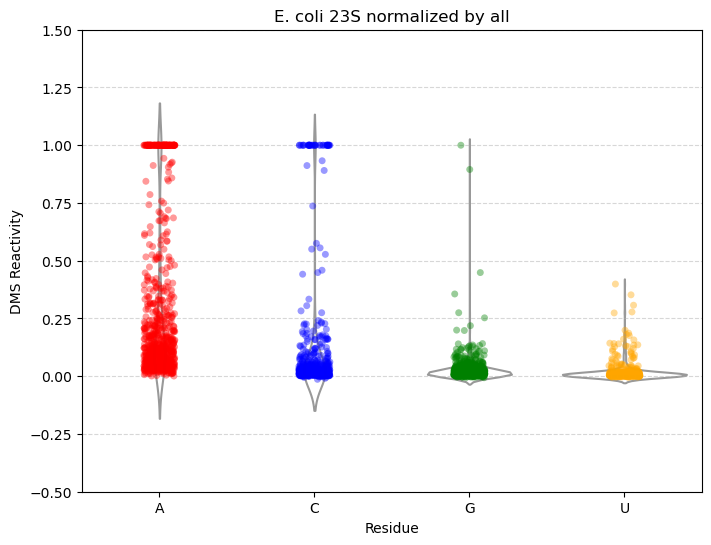

In [82]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_23s, inner=None, alpha=0.5, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 23S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3445085827.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


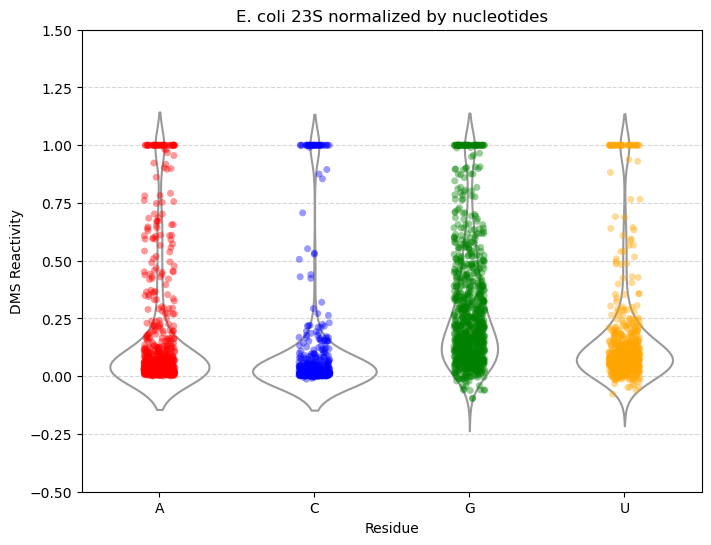

In [83]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_23s, inner=None, alpha=0.5, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 23S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3860273186.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


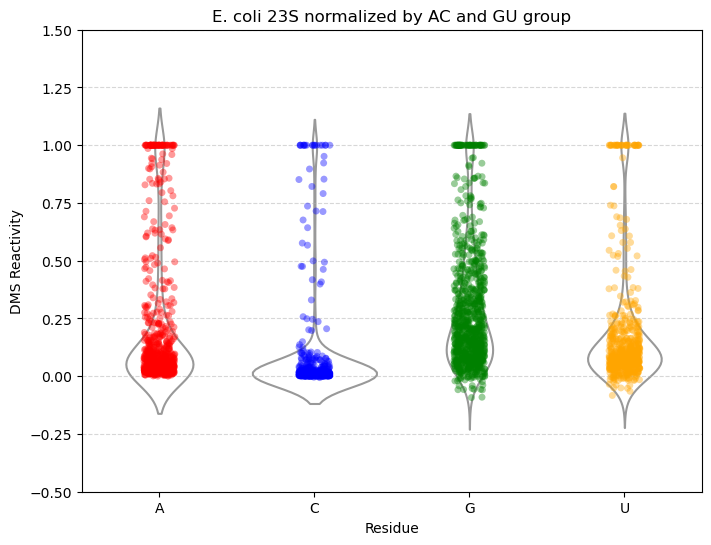

In [84]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_23s, inner=None, alpha=0.5, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=raw_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-0.5, 1.5)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("E. coli 23S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Normalization of ETC reactivities

In [535]:
raw_ecoli_ETC1= normalize_all_new(raw_ecoli_ETC)

In [536]:
raw_ecoli_ETC2= normalize_nt_new(raw_ecoli_ETC1)

In [537]:
raw_ecoli_ETC3= normalize_grp(raw_ecoli_ETC2)

In [538]:
raw_ecoli_ETC3[:10]

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp
0,ecoli5S,1,U,0,5447,5244,0.000000,0,241,5447,...,NaN,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ecoli5S,2,G,0,5565,5306,0.000000,0,270,5565,...,NaN,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ecoli5S,3,C,331,5675,5502,0.060160,0,288,5675,...,NaN,0,0,0,-0.078168,NaN,NaN,NaN,NaN,NaN
3,ecoli5S,4,C,0,5782,5602,0.000000,0,311,5782,...,NaN,0,0,0,-0.000835,-0.000835,-0.012525,-0.100000,-0.100000,-0.100000
4,ecoli5S,5,U,1,5860,5698,0.000176,0,329,5860,...,NaN,0,0,0,-0.000154,-0.000154,-0.002310,-0.100000,-0.053545,-0.098407
5,ecoli5S,6,G,5,5906,5732,0.000872,0,343,5906,...,NaN,0,0,0,-0.000926,-0.000926,-0.013890,-0.100000,-0.100000,-0.100000
6,ecoli5S,7,G,4,5945,5756,0.000695,0,358,5945,...,NaN,0,0,0,-0.000322,-0.000322,-0.004830,-0.100000,-0.100000,-0.100000
7,ecoli5S,8,C,4,5976,5781,0.000692,0,377,5976,...,NaN,0,0,0,0.000442,0.000442,0.006630,0.378764,1.000000,1.000000
8,ecoli5S,9,G,9,6003,5813,0.001548,0,400,6003,...,NaN,0,0,0,-0.000054,-0.000054,-0.000810,-0.046274,-0.041181,-0.034506
9,ecoli5S,10,G,11,6044,5835,0.001885,0,418,6044,...,NaN,0,0,0,-0.000500,-0.000500,-0.007500,-0.100000,-0.100000,-0.100000


In [234]:
raw_ecoli_ETC3.to_csv('Ecoli_ETC_3norms.csv', index= False)

## E. coli 5S 

In [158]:
ETC_ecoli_5s= raw_ecoli_ETC3[raw_ecoli_ETC3['RNA']=='ecoli5S']
ETC_ecoli_5s.index= np.arange(0, len(ETC_ecoli_5s))

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2294827355.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


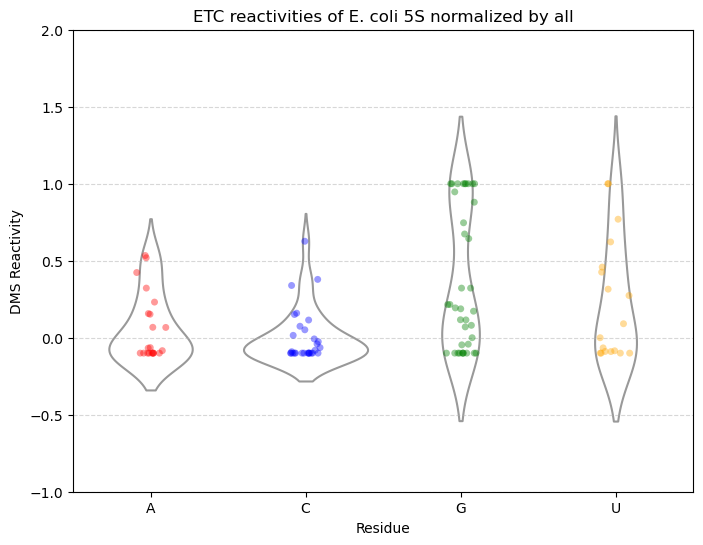

In [163]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 5S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3070868474.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


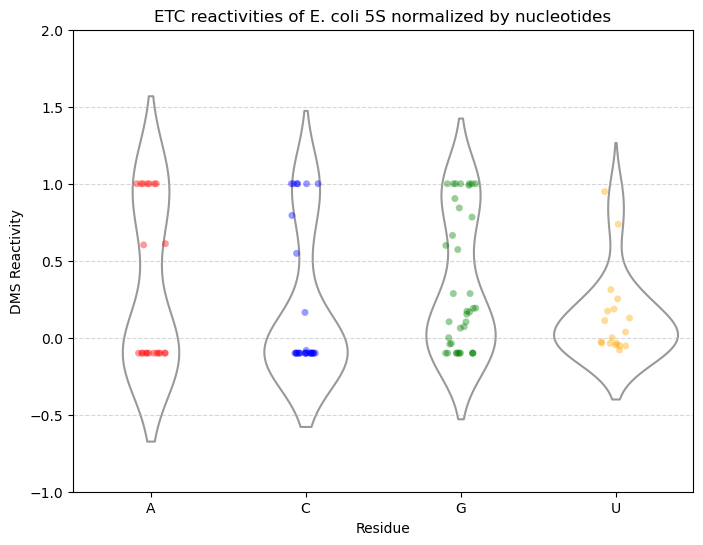

In [162]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 5S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3106273125.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


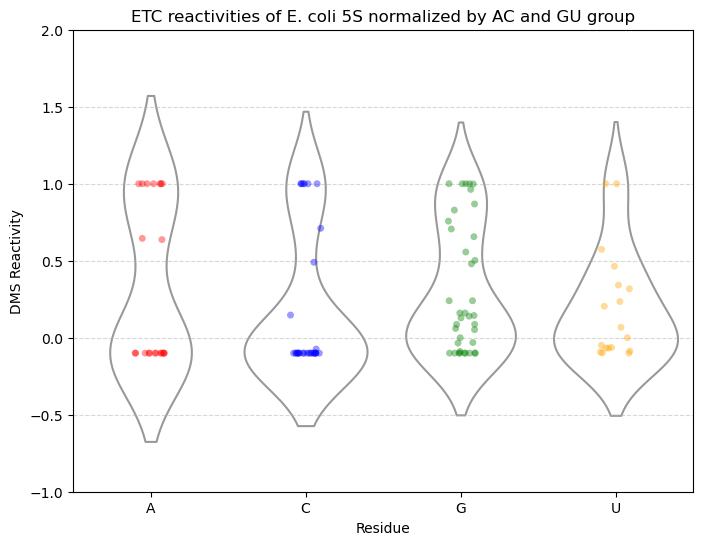

In [164]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_5s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_5s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 5S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

## E. coli 16S

In [165]:
ETC_ecoli_16s= raw_ecoli_ETC3[raw_ecoli_ETC3['RNA']=='ecoli16S']
ETC_ecoli_16s.index= np.arange(0, len(ETC_ecoli_16s))

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3817418674.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


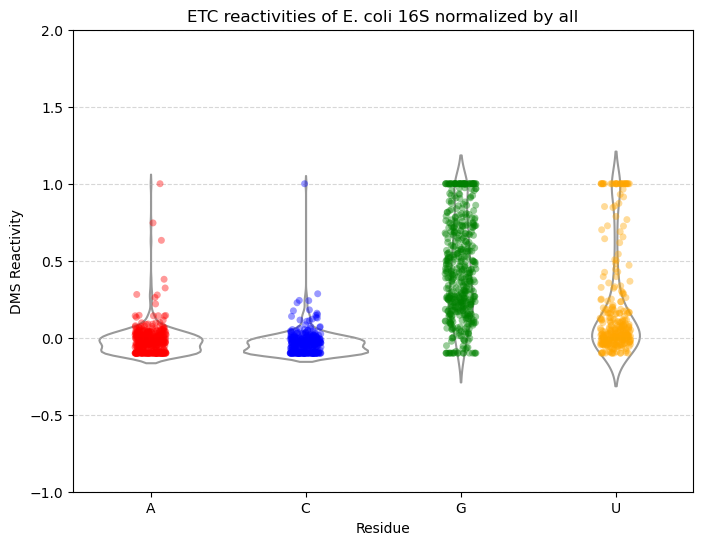

In [166]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_16s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 16S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/3966307982.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


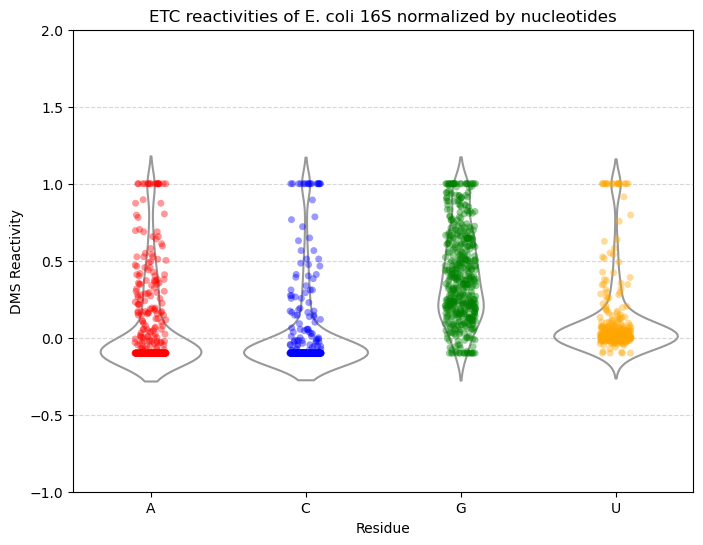

In [173]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_16s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 16S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2381610218.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


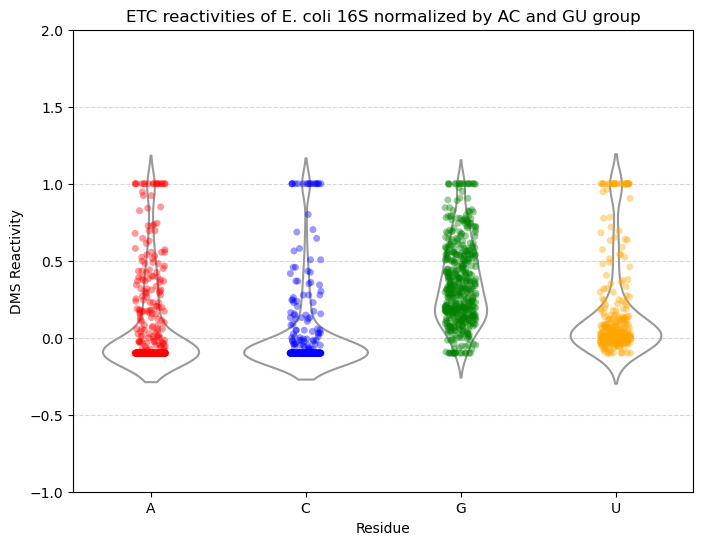

In [172]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_16s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_16s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 16S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

## E. coli 23S 

In [169]:
ETC_ecoli_23s= raw_ecoli_ETC3[raw_ecoli_ETC3['RNA']=='ecoli23S']
ETC_ecoli_23s.index= np.arange(0, len(ETC_ecoli_23s))

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/663045972.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


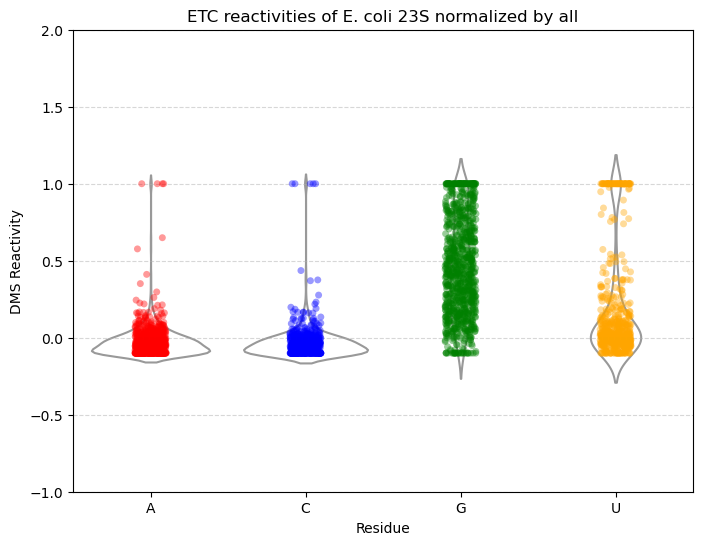

In [170]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_23s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_all", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 23S normalized by all")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1699481966.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


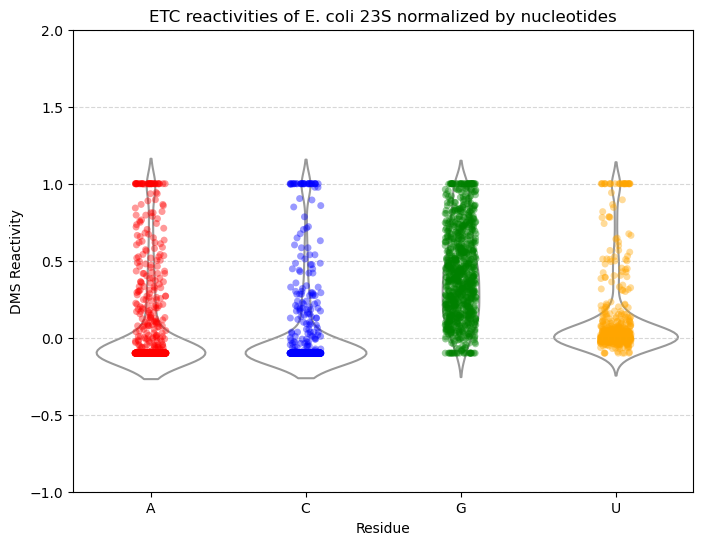

In [174]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_23s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_nt", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 23S normalized by nucleotides")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/1616665083.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot


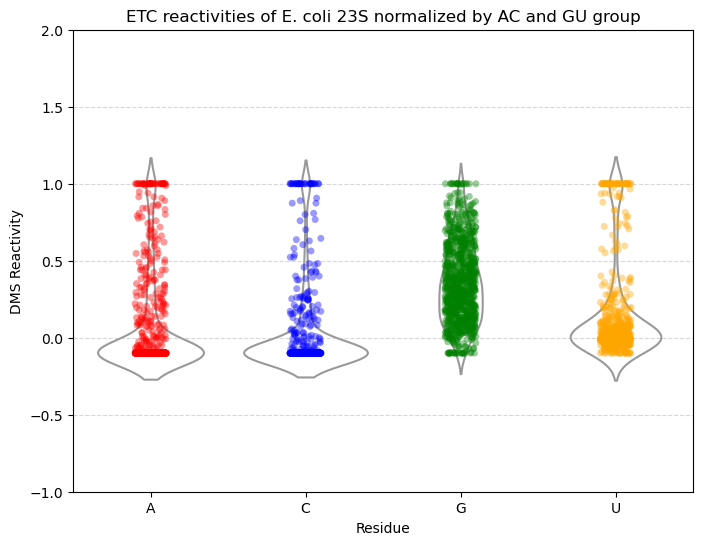

In [175]:
residue_order = ["A", "C", "G", "U"]
color_palette = {"A": "red", "C": "blue", "G": "green", "U": "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_23s, inner=None, alpha=0.8, order= residue_order, color= 'white')  # Violin plot
sns.stripplot(x="Sequence", y="norm_reactivity_grp", data=ETC_ecoli_23s, palette=color_palette, alpha=0.4, jitter=True, order= residue_order)  # Strip plot

plt.ylim(-1, 2)
# Customize the plot
plt.xlabel("Residue")
plt.ylabel("DMS Reactivity")
plt.title("ETC reactivities of E. coli 23S normalized by AC and GU group")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [186]:
DMS_ecoli= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/dms_reactivities_E_coli.csv')

In [195]:
DMS_ecoli[DMS_ecoli['RNA']=='16S']

,RNA,ref_index,sequence,pairing,DMS
120,16S,1,A,0.0,0.000000
121,16S,2,A,0.0,0.000000
122,16S,3,A,0.0,0.243721
123,16S,4,U,0.0,0.680163
124,16S,5,U,0.0,0.830410
...,...,...,...,...,...
1649,16S,1530,G,0.0,0.303551
1650,16S,1531,A,0.0,0.536595
1651,16S,1532,U,0.0,NaN
1652,16S,1533,C,0.0,NaN


In [196]:
raw_ecoli3[raw_ecoli3['RNA']=='16S']

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp
120,16S,1,A,0,735967,587184,0.000000,0,2499,735967,...,NaN,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,16S,2,A,0,772182,443495,0.000000,0,2596,772182,...,NaN,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
122,16S,3,A,8315,813098,488107,0.017035,0,2673,813098,...,NaN,0,0,0,0.015491,0.015490,0.195783,0.832330,0.265724,0.372795
123,16S,4,U,880,846697,586439,0.001501,0,2742,846697,...,NaN,0,0,0,0.001086,0.001087,0.013739,0.058408,0.767610,0.822935
124,16S,5,U,1580,867185,808767,0.001954,0,2798,867185,...,NaN,0,0,0,0.001326,0.001327,0.016772,0.071304,0.937092,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,16S,1538,C,4,371481,464,0.008621,0,4414,371481,...,NaN,0,0,0,0.008621,NaN,NaN,NaN,NaN,NaN
1658,16S,1539,C,2,359393,439,0.004556,0,4372,359393,...,NaN,0,0,0,0.002129,NaN,NaN,NaN,NaN,NaN
1659,16S,1540,U,3,333852,441,0.006803,0,4311,333852,...,NaN,0,0,0,0.006803,NaN,NaN,NaN,NaN,NaN
1660,16S,1541,U,1,305424,401,0.002494,0,4192,305424,...,NaN,0,0,0,-0.005401,NaN,NaN,NaN,NaN,NaN


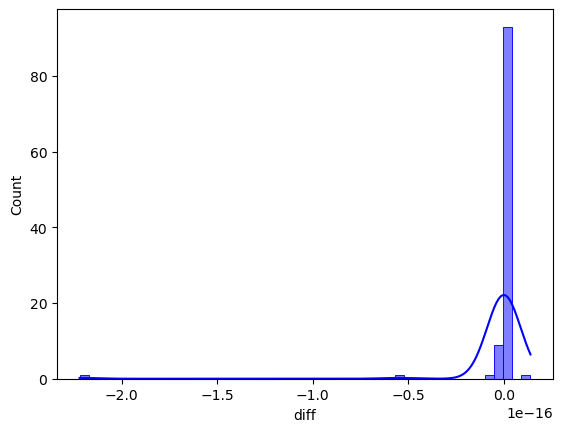

In [57]:
ax= sns.histplot(raw_ecoli_5S1['diff'], bins=50, kde=True, color='blue', edgecolor='blue')

# ROC plots

In [443]:
#E. coli
dms_ecoli = pd.read_excel('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/reactivities.xlsx', sheet_name="DMS_E_coli")
##dms_ecoli = dms_ecoli.dropna(subset=['Nucleotide', 'pairing'])
##dms_ecoli['Nucleotide'] = dms_ecoli['Nucleotide'].astype(int)

In [444]:
#Yeast
dms_yeast = pd.read_excel('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/reactivities.xlsx', sheet_name="DMS_S_cerevisiae")
##dms_yeast = dms_yeast.dropna(subset=['Nucleotide', 'pairing'])
##dms_yeast['Nucleotide'] = dms_yeast['Nucleotide'].astype(int)

In [445]:
#human
dms_human = pd.read_excel('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/reactivities.xlsx', sheet_name="DMS_H_sapiens")
##dms_human = dms_human.dropna(subset=['Nucleotide', 'pairing'])
##dms_human['Nucleotide'] = dms_human['Nucleotide'].astype(int)

# ROC for all rRNA residues

## E. coli 

In [408]:
res_int= ['A', 'C']
dms_ecoli_AC= dms_ecoli[dms_ecoli['Sequence'].isin(res_int)]
dms_ecoli_AC.index= np.arange(0, len(dms_ecoli_AC))

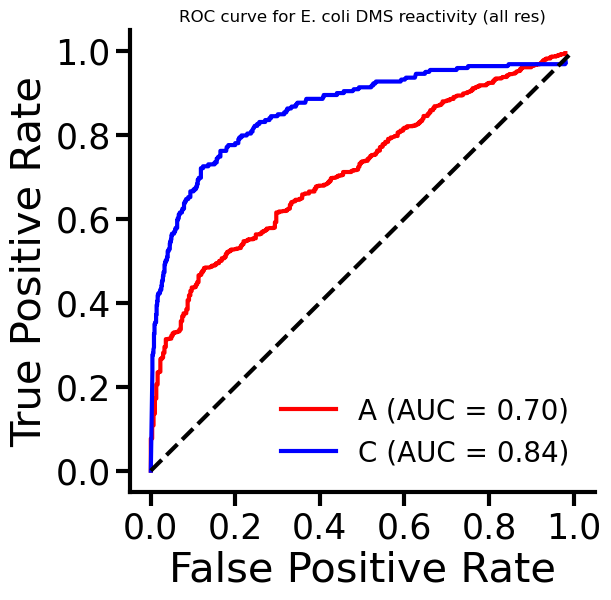

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_ecoli_AC[dms_ecoli_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for E. coli DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_Ecoli_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

## Yeast 

In [410]:
res_int= ['A', 'C']
dms_yeast_AC= dms_yeast[dms_yeast['Sequence'].isin(res_int)]
dms_yeast_AC.index= np.arange(0, len(dms_yeast_AC))

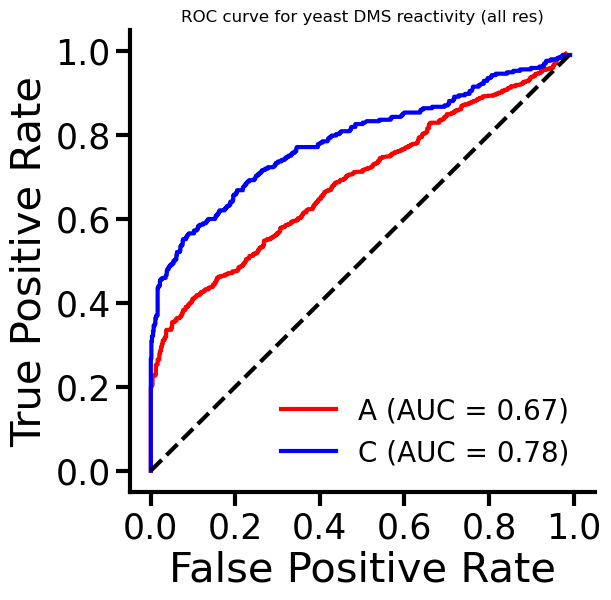

In [427]:
# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_yeast_AC[dms_yeast_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for yeast DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_Ecoli_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# Human

In [412]:
res_int= ['A', 'C']
dms_human_AC= dms_human[dms_human['Sequence'].isin(res_int)]
dms_human_AC.index= np.arange(0, len(dms_human_AC))

In [261]:
dms_human_AC

,RNA,Nucleotide,Sequence,pairing,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp
0,5S,3,C,1.0,421,123098,116260,0.003621,0,0,...,NaN,0,0,0,0.003621,0.003621,0.048280,0.102126,0.054617,0.057223
1,5S,5,A,1.0,691,132064,128422,0.005381,0,0,...,NaN,0,0,0,0.005381,0.005381,0.071747,0.151765,0.093711,0.085036
2,5S,6,C,1.0,536,133348,129410,0.004142,0,0,...,NaN,0,0,0,0.004142,0.004142,0.055227,0.116820,0.062476,0.065456
3,5S,9,C,1.0,547,141303,136797,0.003999,0,0,...,NaN,0,0,0,0.003999,0.003999,0.053320,0.112787,0.060319,0.063196
4,5S,10,C,0.0,361,149732,145331,0.002484,0,0,...,NaN,0,0,0,0.002484,0.002484,0.033120,0.070058,0.037467,0.039255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,28S,5056,C,1.0,29,3830,3389,0.008557,0,0,...,NaN,0,0,0,0.008557,0.008557,0.126459,0.241340,0.129069,0.135227
2667,28S,5057,A,0.0,83,3615,3077,0.026974,0,0,...,NaN,0,0,0,0.026974,0.026974,0.398633,0.760770,0.469757,0.426272
2668,28S,5058,C,1.0,89,3192,2993,0.029736,0,0,...,NaN,0,0,0,0.029736,0.029736,0.439451,0.838669,0.448522,0.469920
2669,28S,5059,A,1.0,111,3094,2653,0.041839,0,0,...,NaN,0,0,0,0.041839,0.041839,0.618315,1.000000,0.728633,0.661185


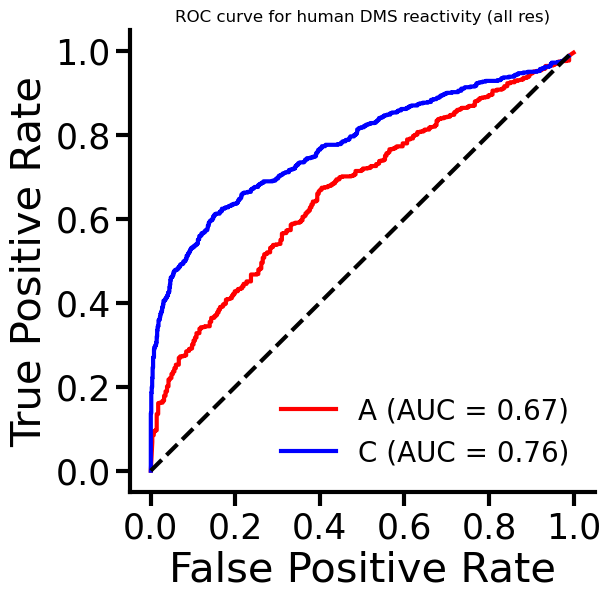

In [428]:
# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_human_AC[dms_human_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for human DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_Ecoli_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# ROC for PTC residues

## E. coli 

In [414]:
ptc_res = [num for r in [range(2048, 2082), range(2239, 2259), range(2422, 2620)] for num in r]
print(ptc_res)
print (len(ptc_res))

[2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 253

In [415]:
#E. coli 23S rRNA
dms_ecoli_rt= dms_ecoli[dms_ecoli['RNA']=='23S']
dms_ecoli_rt.index= np.arange(0, len(dms_ecoli_rt))

dms_ecoli_ri= dms_ecoli_rt[dms_ecoli_rt['Nucleotide'].isin(ptc_res)]
dms_ecoli_ri.index= np.arange(0, len(dms_ecoli_ri))

print (dms_ecoli_rt.shape)
print (dms_ecoli_ri.shape)

(2898, 31)
(252, 31)


In [416]:
PTC_ecoli_AC= dms_ecoli_ri[dms_ecoli_ri['Sequence'].isin(['A', 'C'])]
PTC_ecoli_AC.index= np.arange(0, len(PTC_ecoli_AC))

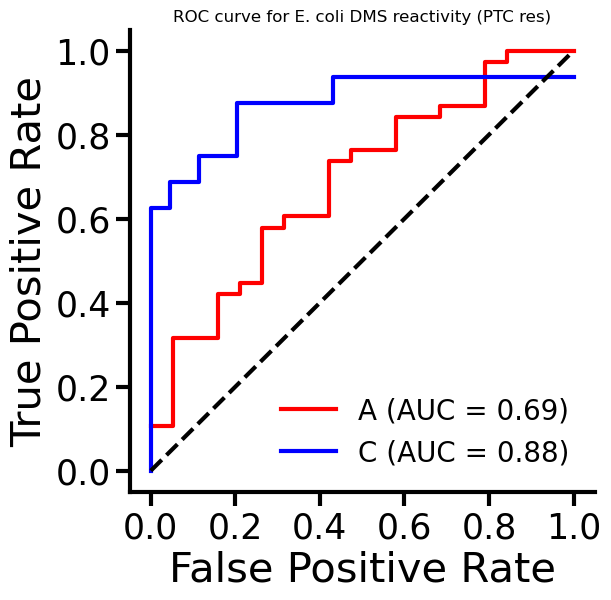

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_ecoli_AC[PTC_ecoli_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for E. coli DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_Ecoli_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)


## yeast 

In [418]:
ptc_res = [num for r in [range(2390, 2424), range(2607, 2629), range(2794, 2990)] for num in r]

In [420]:
dms_yeast_rt= dms_yeast[dms_yeast['RNA']=='25S']
dms_yeast_rt.index= np.arange(0, len(dms_yeast_rt))

dms_yeast_ri= dms_yeast_rt[dms_yeast_rt['Nucleotide'].isin(ptc_res)]
dms_yeast_ri.index= np.arange(0, len(dms_yeast_ri))

print (dms_yeast_rt.shape)
print (dms_yeast_ri.shape)

(3251, 31)
(252, 31)


In [421]:
PTC_yeast_AC= dms_yeast_ri[dms_yeast_ri['Sequence'].isin(res_int)]
PTC_yeast_AC.index= np.arange(0, len(PTC_yeast_AC))

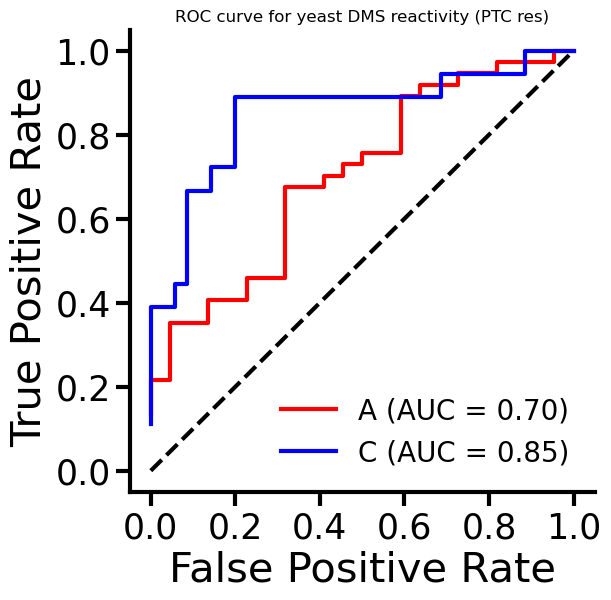

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_yeast_AC[PTC_yeast_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for yeast DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_yeast_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

## Human 

In [432]:
ptc_res = [num for r in [range(3894, 3928), range(4183, 4205), range(4370, 4567)] for num in r]

In [434]:
dms_hsapien_rt= dms_human[dms_human['RNA']=='28S']
dms_hsapien_rt.index= np.arange(0, len(dms_hsapien_rt))

dms_hsapien_rt['Nucleotide']= dms_hsapien_rt['Nucleotide']+1
dms_hsapien_ri= dms_hsapien_rt[dms_hsapien_rt['Nucleotide'].isin(ptc_res)]
dms_hsapien_ri.index= np.arange(0, len(dms_hsapien_ri))

print (dms_hsapien_rt.shape)
print (dms_hsapien_ri.shape)

(3773, 31)
(253, 31)


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2591350311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dms_hsapien_rt['Nucleotide']= dms_hsapien_rt['Nucleotide']+1


In [436]:
PTC_hsapien_AC= dms_hsapien_ri[dms_hsapien_ri['Sequence'].isin(res_int)]
PTC_hsapien_AC.index= np.arange(0, len(PTC_hsapien_AC))

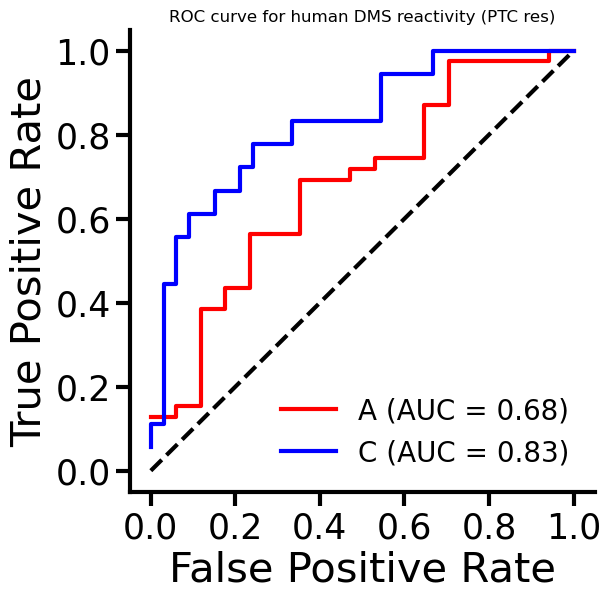

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_hsapien_AC[PTC_hsapien_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
plt.title("ROC curve for human DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
#plt.savefig('fig_S4_human_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

In [228]:
pH = pd.read_excel('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/reactivities.xlsx', sheet_name="pH_test")

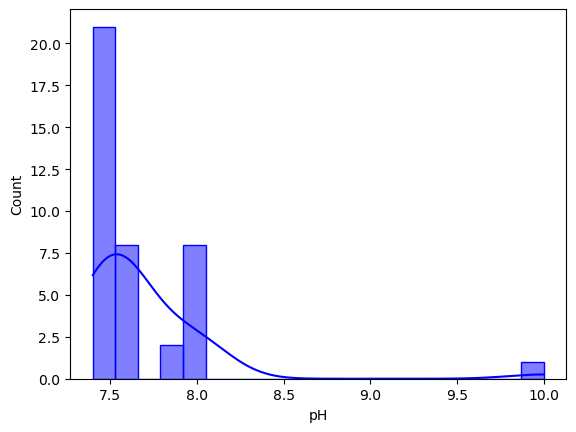

In [233]:
ax= sns.histplot(pH['pH'], bins=20, kde=True, color='blue', edgecolor='blue')

In [289]:
raw_ecoli3

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp
0,5S,1,U,0,11646,10806,0.000000,0,2336,11646,...,NaN,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,5S,2,G,0,12474,11336,0.000000,0,2477,12474,...,NaN,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,5S,3,C,2059,13284,12402,0.166022,0,2663,13284,...,NaN,0,0,0,0.027694,NaN,NaN,NaN,NaN,NaN
3,5S,4,C,21,14315,13364,0.001571,0,2926,14315,...,NaN,0,0,0,0.000737,0.000736,0.01104,0.039548,0.037942,0.017713
4,5S,5,U,11,15000,14103,0.000780,0,3156,15000,...,NaN,0,0,0,0.000450,0.000450,0.00675,0.024180,0.317778,0.340681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,23S,2900,A,2,496385,2494,0.000802,0,25348,496385,...,NaN,0,0,0,0.000402,NaN,NaN,NaN,NaN,NaN
4562,23S,2901,C,3,483048,2361,0.001271,0,25288,483048,...,NaN,0,0,0,-0.000013,NaN,NaN,NaN,NaN,NaN
4563,23S,2902,C,1,451968,2775,0.000360,0,25182,451968,...,NaN,0,0,0,0.000005,NaN,NaN,NaN,NaN,NaN
4564,23S,2903,U,1,396265,2711,0.000369,0,24941,396265,...,NaN,0,0,0,-0.000375,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_ecoli3[raw_ecoli3['Nucleotide']]

In [376]:
raw_ecoli5= raw_ecoli3[raw_ecoli3['RNA']=='16S']
raw_ecoli5.index= np.arange(0, len(raw_ecoli5))

raw_ecoli_p= raw_ecoli5[raw_ecoli5['Nucleotide'].between(668, 738, inclusive='both')]
raw_ecoli_p.index= np.arange(0, len(raw_ecoli_p))

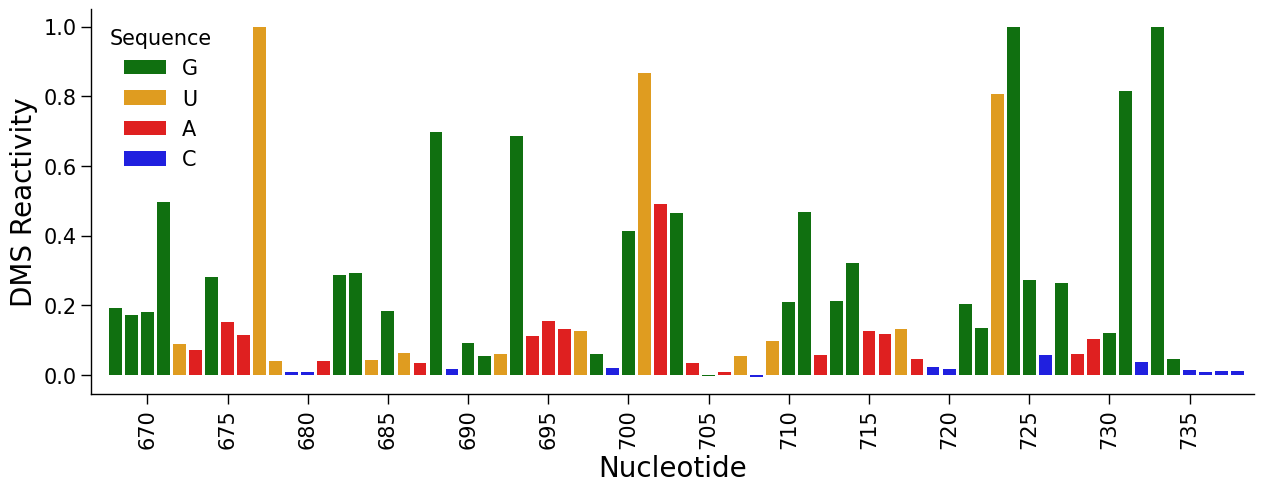

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
data = {
    'nucleotide': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'sequence': ['A', 'C', 'G', 'U', 'A', 'G', 'C', 'U', 'A', 'G'],
    'reactivity': [0.1, 0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.6, 0.3, 0.1]
}

df = pd.DataFrame(data)

# Define colors for different residue IDs
residue_colors = {'A': 'red', 'C': 'blue', 'G': 'green', 'U': 'orange'}

# Plot
plt.figure(figsize=(15, 5))
sns.barplot(x='Nucleotide', y='norm_reactivity_nt', hue='Sequence', data=raw_ecoli_p, palette=residue_colors, dodge=False)

plt.tick_params(axis='both', width=1, length=7)

#x axis customization
plt.xlim(-1.5, 71)
ticks_loc=[2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67]
tick_labels= ['670', '675', '680', '685', '690', '695', '700', '705', '710', '715', '720', '725', '730', '735']
plt.xticks(rotation=90)
plt.xticks(ticks=ticks_loc, labels=tick_labels, rotation=90, fontsize = 15)

#y axis customization
plt.yticks(fontsize = 15)
##tick_positions = raw_ecoli_p['Nucleotide'][::2].to_list()  # Show ticks at every 2nd nucleotide position
##plt.xticks(ticks=tick_positions, labels=tick_positions, rotation=90)
plt.xlabel("Nucleotide", fontsize= 20)
plt.ylabel("DMS Reactivity", fontsize= 20)

# Adjust legend
plt.legend(title="Sequence", fontsize=15, title_fontsize=15, frameon=False) 

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(1)
ax.spines.bottom.set_linewidth(1)

plt.savefig('ecoli_DMS_reactivities_barplot.pdf', format="pdf", bbox_inches="tight", dpi = 3000)


In [361]:
print (os.getcwd())

/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie


## Calculating p-values from one-tailed t-test 

In [526]:
# before the t-test we need to know if the distribution of the rectivities is normal
#checking if the distribution of DMS reactivities of E. coli rRNA
# mean== median== mode for a normal distribution

raw_ecoli3_A= raw_ecoli3[raw_ecoli3['Sequence']== 'A']
raw_ecoli3_A = raw_ecoli3_A.dropna(subset=['norm_reactivity_nt'])
raw_ecoli3_A.index= np.arange(0, len(raw_ecoli3_A))

raw_ecoli3_C= raw_ecoli3[raw_ecoli3['Sequence']== 'C']
raw_ecoli3_C = raw_ecoli3_C.dropna(subset=['norm_reactivity_nt'])
raw_ecoli3_C.index= np.arange(0, len(raw_ecoli3_C))

raw_ecoli3_G= raw_ecoli3[raw_ecoli3['Sequence']== 'G']
raw_ecoli3_G = raw_ecoli3_G.dropna(subset=['norm_reactivity_nt'])
raw_ecoli3_G.index= np.arange(0, len(raw_ecoli3_G))

raw_ecoli3_U= raw_ecoli3[raw_ecoli3['Sequence']== 'U']
raw_ecoli3_U = raw_ecoli3_U.dropna(subset=['norm_reactivity_nt'])
raw_ecoli3_U.index= np.arange(0, len(raw_ecoli3_U))

In [527]:
import scipy.stats as stats
#skewness = stats.skew(data)
print (stats.skew(raw_ecoli3_A['norm_reactivity_nt']))
print (stats.skew(raw_ecoli3_C['norm_reactivity_nt']))
print (stats.skew(raw_ecoli3_G['norm_reactivity_nt']))
print (stats.skew(raw_ecoli3_U['norm_reactivity_nt']))

2.2942918432534793
3.0592778593155825
1.3313250891209922
2.516233302980945


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2672973518.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig= sns.kdeplot(raw_ecoli3_A['norm_reactivity_nt'], shade=True, color='r')
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2672973518.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig= sns.kdeplot(raw_ecoli3_C['norm_reactivity_nt'], shade=True, color='g')
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_3626/2672973518.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig= sns.kdeplot(raw_ecoli3_G['norm_reactivity_nt'], shade=True, color='b')
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipyker

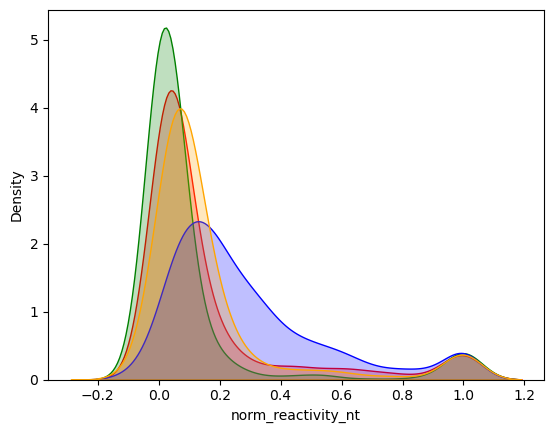

In [520]:
fig= sns.kdeplot(raw_ecoli3_A['norm_reactivity_nt'], shade=True, color='r')
fig= sns.kdeplot(raw_ecoli3_C['norm_reactivity_nt'], shade=True, color='g')
fig= sns.kdeplot(raw_ecoli3_G['norm_reactivity_nt'], shade=True, color='b')
fig= sns.kdeplot(raw_ecoli3_U['norm_reactivity_nt'], shade=True, color='orange')

In [446]:
def calculate_one_tailed_pvalues(df):
    """
    Calculates one-tailed p-values for values greater than the mean
    for each nucleotide type ('A', 'C', 'G', 'U') based on reactivity.
    
    Parameters:
    df (pd.DataFrame): A DataFrame containing columns 'Sequence' (residue ID)
                       and 'reactivity' (DMS reactivity values).
    
    Returns:
    pd.DataFrame: A DataFrame with original data and computed p-values.
    """
    # Create a new column to store p-values
    df['p_value'] = None
    
    for nt in ['A', 'C', 'G', 'U']:
        subset = df[df['Sequence'] == nt]['norm_reactivity_nt']  # Select values for this nucleotide
        mean_val = subset.mean()  # Compute mean
        std_val = subset.std()  # Compute standard deviation
        
        # Avoid division by zero
        if std_val == 0:
            df.loc[df['Sequence'] == nt, 'p_value'] = 1.0  # Assign p-value = 1 if all values are identical
        else:
            # Compute p-values for values greater than the mean
            df.loc[df['Sequence'] == nt, 'p_value'] = subset.apply(lambda x: 1 - norm.cdf(x, loc=mean_val, scale=std_val))
    
    return df

In [539]:
raw_ecoli_sig= calculate_one_tailed_pvalues(raw_ecoli3)
raw_yeast_sig= calculate_one_tailed_pvalues(raw_yeast3)
raw_human_sig= calculate_one_tailed_pvalues(raw_human3)
raw_ecoli_ETC3_sig= calculate_one_tailed_pvalues(raw_ecoli_ETC3)

In [541]:
with pd.ExcelWriter("reactivities_significance.xlsx", engine='xlsxwriter') as writer:
    raw_ecoli_sig.to_excel(writer, sheet_name= 'ecoli_DMS', index=False)
    raw_yeast_sig.to_excel(writer, sheet_name= "yeast_DMS", index=False)
    raw_human_sig.to_excel(writer, sheet_name= "human_DMS", index=False)
    raw_ecoli_ETC3_sig.to_excel(writer, sheet_name= "ecoli_ETC", index=False)

In [540]:
raw_ecoli_ETC3_sig

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,p_value
0,ecoli5S,1,U,0,5447,5244,0.000000,0,241,5447,...,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.66741
1,ecoli5S,2,G,0,5565,5306,0.000000,0,270,5565,...,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.913896
2,ecoli5S,3,C,331,5675,5502,0.060160,0,288,5675,...,0,0,0,-0.078168,NaN,NaN,NaN,NaN,NaN,NaN
3,ecoli5S,4,C,0,5782,5602,0.000000,0,311,5782,...,0,0,0,-0.000835,-0.000835,-0.012525,-0.1,-0.100000,-0.100000,0.667849
4,ecoli5S,5,U,1,5860,5698,0.000176,0,329,5860,...,0,0,0,-0.000154,-0.000154,-0.002310,-0.1,-0.053545,-0.098407,0.739785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,ecoli23S,2900,A,6,119476,1520,0.003947,0,4674,119476,...,0,0,0,0.003548,NaN,NaN,NaN,NaN,NaN,NaN
4562,ecoli23S,2901,C,3,115941,1434,0.002092,0,4647,115941,...,0,0,0,0.000808,NaN,NaN,NaN,NaN,NaN,NaN
4563,ecoli23S,2902,C,1,108524,1703,0.000587,0,4617,108524,...,0,0,0,0.000232,NaN,NaN,NaN,NaN,NaN,NaN
4564,ecoli23S,2903,U,4,94037,1614,0.002478,0,4584,94037,...,0,0,0,0.001734,NaN,NaN,NaN,NaN,NaN,NaN


In [453]:
raw_ecoli_sig1= raw_ecoli_sig[(raw_ecoli_sig['RNA']== '23S') & (raw_ecoli_sig['Nucleotide'].between(2292, 2340, inclusive='both'))]

In [454]:
raw_ecoli_sig1[:50]

,RNA,Nucleotide,Sequence,pairing,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,p_value
3953,23S,2292,U,1.0,496,1121345,903003,0.000549,0,1947,...,0,0,0,0.000051,0.000050,0.000631,0.002687,0.035309,0.037853,0.702338
3954,23S,2293,G,1.0,283,1123500,1002634,0.000282,0,1941,...,0,0,0,0.000091,0.000091,0.001149,0.004890,0.072106,0.068893,0.79607
3955,23S,2294,G,1.0,147,1122561,999455,0.000147,0,1927,...,0,0,0,0.000079,0.000079,0.000997,0.004245,0.062597,0.059809,0.806193
3956,23S,2295,C,1.0,731,1117973,992395,0.000737,0,1921,...,0,0,0,0.000156,0.000156,0.001970,0.008382,0.008042,0.003754,0.654461
3957,23S,2296,U,0.0,834,1099406,996465,0.000837,0,1856,...,0,0,0,0.000185,0.000185,0.002336,0.009941,0.130642,0.140058,0.556853
3958,23S,2297,A,0.0,925,1093091,1001484,0.000924,0,1845,...,0,0,0,0.000442,0.000443,0.005593,0.023804,0.007599,0.010662,0.720188
3959,23S,2298,A,0.0,44562,1093870,998972,0.044608,0,1860,...,0,0,0,0.044385,0.044385,0.560409,1.000000,0.761404,1.000000,0.01052
3960,23S,2299,U,1.0,535,1098814,998906,0.000536,0,1891,...,0,0,0,0.000148,0.000148,0.001869,0.007953,0.104514,0.112046,0.598464
3961,23S,2300,C,1.0,348,1101675,983869,0.000354,0,1896,...,0,0,0,0.000006,0.000006,0.000076,0.000322,0.000309,0.000144,0.665946
3962,23S,2301,C,1.0,258,1103666,987496,0.000261,0,1912,...,0,0,0,0.000029,0.000029,0.000366,0.001558,0.001495,0.000698,0.664195


In [503]:
raw_yeast_sig= calculate_one_tailed_pvalues(dms_yeast)

In [504]:
raw_yeast_sig1= raw_yeast_sig[(raw_yeast_sig['RNA']=='25S')]

In [497]:
#raw_yeast_sig1= raw_yeast_sig[(raw_yeast_sig['RNA']=='yeast25S') & (raw_yeast_sig['Nucleotide'].between(438, 499, inclusive='both'))]

In [505]:
raw_yeast_sig1[:60]

,RNA,Nucleotide,Sequence,pairing,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,p_value
2079,25S,1,NaN,NaN,0,2561,2422,0.000000,0,0,...,0,0,1160,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,None
2080,25S,2,NaN,NaN,0,23662,22915,0.000000,0,0,...,0,0,6852,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,None
2081,25S,3,U,0.0,1,66449,64521,0.000015,0,0,...,0,0,11556,0.088111,0.000015,0.000189,0.000704,0.015542,0.008518,0.603245
2082,25S,4,U,1.0,4,69937,66410,0.000060,0,0,...,0,0,11999,-0.388595,-0.000067,-0.000843,-0.003142,-0.069420,-0.038049,0.705561
2083,25S,5,G,1.0,125,71609,67467,0.001853,0,0,...,0,0,12320,0.275178,0.001107,0.013924,0.051919,0.466855,0.628665,0.193488
2084,25S,6,A,0.0,198,74443,70660,0.002802,0,0,...,0,0,12948,0.072077,0.002041,0.025671,0.095725,0.032513,0.039833,0.668245
2085,25S,7,C,1.0,242,77507,74728,0.003238,0,0,...,0,0,13769,0.068109,0.001609,0.020238,0.075464,0.046429,0.031402,0.596196
2086,25S,8,C,1.0,192,79768,77183,0.002488,0,0,...,0,0,14625,0.033666,0.000746,0.009383,0.034988,0.021526,0.014559,0.633481
2087,25S,9,U,1.0,112,82889,80287,0.001395,0,0,...,0,0,15608,-0.223495,-0.000266,-0.003346,-0.012476,-0.100000,-0.100000,0.739166
2088,25S,10,C,1.0,158,86085,83517,0.001892,0,0,...,0,0,16147,0.023589,0.000617,0.007760,0.028938,0.017804,0.012042,0.638957


In [509]:
raw_yeast4= raw_yeast3[(raw_yeast3['RNA']=='yeast25S')]
raw_yeast4

,RNA,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,...,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,raw_reactivity,norm_reactivity,norm_reactivity_all,norm_reactivity_nt,norm_reactivity_grp,p_value
2079,yeast25S,1,G,0,2561,2422,0.000000,0,0,2561,...,0,0,1160,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.743025
2080,yeast25S,2,U,0,23662,22915,0.000000,0,0,23662,...,0,0,6852,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.62686
2081,yeast25S,3,U,1,66449,64521,0.000015,0,0,66449,...,0,0,11556,0.088111,0.000015,0.000189,0.000704,0.015542,0.008518,0.607666
2082,yeast25S,4,U,4,69937,66410,0.000060,0,0,69937,...,0,0,11999,-0.388595,-0.000067,-0.000843,-0.003142,-0.069420,-0.038049,0.708242
2083,yeast25S,5,G,125,71609,67467,0.001853,0,0,71609,...,0,0,12320,0.275178,0.001107,0.013924,0.051919,0.466855,0.628665,0.200233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,yeast25S,3392,U,1,211,181,0.005525,0,2,211,...,0,0,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5471,yeast25S,3393,U,0,197,174,0.000000,0,2,197,...,0,0,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5472,yeast25S,3394,U,2,185,168,0.011905,0,2,185,...,0,0,182,0.809524,NaN,NaN,NaN,NaN,NaN,NaN
5473,yeast25S,3395,G,0,174,162,0.000000,0,2,174,...,0,0,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# assigning base pairs

In [652]:
#ecoli base pair
#Escherichia coli (4YBB, X-ray, 2.10 Å)
#base pair information csv were generated by characterizing the corresponding structure using DSSR
ecoli_bp= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/assigning_bp/4YBB_bps_info.csv')

#yeast base pair
#Saccharomyces cerevisiae (4V88, X-ray, 3.00 Å)
#base pair information csv were generated by characterizing the corresponding structure using DSSR
yeast_bp= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/assigning_bp/4V88_bps_info.csv')

#human base pair
#Homo sapiens (8QOI, cryo-EM, 1.90 Å) 
#base pair information csv were generated by characterizing the corresponding structure using DSSR
human_bp= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie/assigning_bp/8QOI_bps_info.csv')

In [ ]:
def pair_df(p, c, R, b):
    #p= PDB_ID
    #c= chain ID 
    #R= RNA type such as 5S, 5.8S, 16S, 18S, 23S, 25S, 28S
    #if b=0, only canonical base pair should be considered
    #if b=1, all base pair should be considered
    #

In [618]:


human_bp['res_IND1'] = human_bp['nt1'].str.extract(r'(\d+)$')
human_bp['res_IND2'] = human_bp['nt2'].str.extract(r'(\d+)$')

def extract_res1(nt1_value):
    match = re.search(r'\.(\D+)\d', nt1_value)  # Look for a dot, followed by non-numeric chars, then a digit
    return match.group(1) if match else None  # Extract matched group or return None

# Apply function to create new column 'res1'
human_bp['res_ID1'] = human_bp['nt1'].apply(extract_res1)
human_bp['res_ID2'] = human_bp['nt2'].apply(extract_res1)

In [619]:
human_can= human_bp[human_bp['name'].isin(['WC', 'Wobble'])]
human_can.index= np.arange(0, len(human_can))
#human_all

In [621]:
#human 5S
human_5S = human_can[human_can['nt1'].str.startswith('L7') & human_can['nt1'].str.startswith('L7')]
human_5S.index= np.arange(0, len(human_5S))

#human 18S
human_18S = human_can[human_can['nt1'].str.startswith('S2') & human_can['nt1'].str.startswith('S2')]
human_18S.index= np.arange(0, len(human_18S))

#human 28S
human_28S = human_can[human_can['nt1'].str.startswith('L5') & human_can['nt1'].str.startswith('L5')]
human_28S.index= np.arange(0, len(human_28S))

In [622]:
print (human_5S.shape)
print (human_18S.shape)
print (human_28S.shape)

(36, 12)
(383, 12)
(963, 12)


In [635]:
#generating list of residues index for the residues which are participating in forming any canonical base pair

hcan_5Sres = list(pd.concat([human_5S['res_IND1'], human_5S['res_IND2']]).dropna().astype(int).unique())
hcan_18Sres = list(pd.concat([human_18S['res_IND1'], human_18S['res_IND2']]).dropna().astype(int).unique())
hcan_28Sres = list(pd.concat([human_28S['res_IND1'], human_28S['res_IND2']]).dropna().astype(int).unique())

In [636]:
print (hcan_5Sres)
print (hcan_18Sres)
print (hcan_28Sres)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, 31, 32, 36, 66, 67, 68, 69, 70, 71, 78, 79, 81, 82, 85, 86, 118, 117, 116, 115, 114, 113, 112, 111, 110, 65, 64, 62, 61, 60, 59, 58, 57, 52, 51, 48, 47, 46, 45, 41, 109, 108, 107, 106, 105, 104, 98, 97, 95, 94, 92, 91]
[4, 5, 6, 7, 10, 12, 13, 14, 21, 22, 26, 27, 28, 29, 30, 37, 40, 41, 47, 48, 49, 51, 52, 53, 56, 57, 62, 68, 69, 87, 96, 97, 98, 106, 107, 108, 110, 112, 115, 116, 121, 122, 123, 129, 130, 144, 145, 151, 152, 154, 155, 156, 185, 186, 187, 188, 192, 193, 194, 195, 215, 216, 219, 220, 222, 223, 288, 312, 314, 315, 316, 317, 319, 320, 321, 322, 357, 358, 359, 364, 365, 371, 372, 373, 374, 375, 376, 377, 409, 410, 411, 413, 414, 415, 416, 436, 437, 439, 440, 441, 459, 461, 462, 487, 489, 490, 491, 495, 496, 497, 498, 527, 528, 531, 532, 534, 535, 538, 539, 563, 565, 566, 569, 595, 596, 597, 598, 599, 600, 601, 606, 608, 610, 611, 617, 618, 656, 663, 665, 666, 671, 673, 675, 676, 680, 682, 685, 746, 7

In [638]:
#function to generate a dictionary where index will be the key and ID will be the value for residues within a 
#solved RNA structure and within a chain of interest


from pymol import cmd

def download_and_extract_residues(pdb_id, chain_id=None):
    
    cmd.delete(pdb_id)
    cmd.delete('all')
    """
    Downloads a PDB or mmCIF structure, loads it into PyMOL, and extracts a dictionary 
    mapping residue indices to residue names for a specific chain.

    :param pdb_id: PDB ID of the RNA structure.
    :param chain_id: Specific chain ID to filter (default: None, gets all chains).
    :return: Dictionary {residue index: residue name}
    """
    # Download and load the structure using `create()` to avoid conflicts
    cmd.fetch(pdb_id, async_=0)  # Fetch the PDB structure

    # If it's an mmCIF file, use create() to load it properly
    if pdb_id.endswith('.cif'):
        cmd.create(pdb_id, pdb_id)  # Create a new object for mmCIF files
        
    cmd.remove("solvent")  # Removes water molecules (solvent)
    cmd.remove("resn MG+CA+ZN+FE+NA+K+SPD")
    
    # Construct selection string based on chain_id
    selection = pdb_id  # Default selection
    if chain_id:
        selection = f"{pdb_id} and chain {chain_id}"

    # Initialize dictionary to store residue data
    res_dict = {}

    # Use cmd.iterate() to extract residue information
    cmd.iterate(selection, "res_dict[int(resi)] = resn", space={'res_dict': res_dict})

    return res_dict

# Example Usage in PyMOL:
pdb_id = "8QOI"  # Example PDB ID for an RNA structure
chain_id = "L5"   # Specify chain of interest

h_5S = download_and_extract_residues(pdb_id, 'L7')
h_18S = download_and_extract_residues(pdb_id, 'S2')
h_28S = download_and_extract_residues(pdb_id, 'L5')
print(h_5S)  # Output: {1: 'A', 2: 'G', 3: 'C', ...}


 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
{1: 'G', 2: 'U', 3: 'C', 4: 'U', 5: 'A', 6: 'C', 7: 'G', 8: 'G', 9: 'C', 10: 'C', 11: 'A', 12: 'U', 13: 'A', 14: 'C', 15: 'C', 16: 'A', 17: 'C', 18: 'C', 19: 'C', 20: 'U', 21: 'G', 22: 'A', 23: 'A', 24: 'C', 25: 'G', 26: 'C', 27: 'G', 28: 'C', 29: 'C', 30: 'C', 31: 'G', 32: 'A', 33: 'U', 34: 'C', 35: 'U', 36: 'C', 37: 'G', 38: 'U', 39: 'C', 40: 'U', 41: 'G', 42: 'A', 43: 'U', 44: 'C', 45: 'U', 46: 'C', 47: 'G', 48: 'G', 49: 'A', 50: 'A', 51: 'G', 52: 'C', 53: 'U', 54: 'A', 55: 'A', 56: 'G', 57: 'C', 58: 'A', 59: 'G', 60: 'G', 61: 'G', 62: 'U', 63: 'C', 64: 'G', 65: 'G', 66: 'G', 67: 'C', 68: 'C', 69: 'U', 70: 'G', 71: 'G', 72: 'U', 73: 'U', 74: 'A', 75: 'G', 76: 'U', 77: 'A', 78: 'C', 79: 'U', 80: 'U', 81: 'G', 82: 'G', 83: 'A', 84: 'U', 85: 'G', 86: 'G', 87: 'G', 88: 'A', 89: 'G', 90: 'A', 91: 'C', 92: 'C', 93: 'G', 94: 'C', 95: 'C', 96: 'U', 97: 'G', 98: 'G', 99: 'G', 100

In [650]:
hcan_5Spair = pd.DataFrame(list(h_5S.items()), columns=['residue_index', 'residue_ID'])
hcan_5Spair.insert(0, 'RNA', '5S')

for i, j in enumerate(hcan_5Spair['residue_index']):
    if j in hcan_5Sres:
        hcan_5Spair.loc[(hcan_5Spair['residue_index']==j), "pairing"] = int(1)
    else:
        hcan_5Spair.loc[(hcan_5Spair['residue_index']==j), "pairing"] = int(0)
        
hcan_18Spair = pd.DataFrame(list(h_18S.items()), columns=['residue_index', 'residue_ID'])
hcan_18Spair.insert(0, 'RNA', '18S')

for i, j in enumerate(hcan_18Spair['residue_index']):
    if j in hcan_18Sres:
        hcan_18Spair.loc[(hcan_18Spair['residue_index']==j), "pairing"] = int(1)
    else:
        hcan_18Spair.loc[(hcan_18Spair['residue_index']==j), "pairing"] = int(0)   

        
hcan_28Spair = pd.DataFrame(list(h_28S.items()), columns=['residue_index', 'residue_ID'])
hcan_28Spair.insert(0, 'RNA', '28S')

for i, j in enumerate(hcan_28Spair['residue_index']):
    if j in hcan_28Sres:
        hcan_28Spair.loc[(hcan_28Spair['residue_index']==j), "pairing"] = int(1)
    else:
        hcan_28Spair.loc[(hcan_28Spair['residue_index']==j), "pairing"] = int(0) 

In [651]:
hcan_28Spair

,RNA,residue_index,residue_ID,pairing
0,28S,1,C,0.0
1,28S,2,G,1.0
2,28S,3,C,1.0
3,28S,4,G,1.0
4,28S,5,A,1.0
...,...,...,...,...
3768,28S,5065,U,1.0
3769,28S,5066,U,1.0
3770,28S,5067,U,1.0
3771,28S,5068,G,0.0


In [654]:
print (os.getcwd())

/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/manuscript_things/2_Revised/reactivity_test/to Sharear from Katie
